--- starting epoch 0 ----
accuracy =  0.38875
loss =  2.391785418456583
--- starting epoch 100000 ----
accuracy =  0.99125
loss =  0.040310448482679694
--- starting epoch 200000 ----
accuracy =  0.99375
loss =  0.030701369518644116
--- starting epoch 300000 ----
accuracy =  0.99625
loss =  0.027255069667876556
--- starting epoch 400000 ----
accuracy =  0.99875
loss =  0.025681502772716462
--- starting epoch 500000 ----
accuracy =  0.99875
loss =  0.02488187056676827
--- starting epoch 600000 ----
accuracy =  0.99875
loss =  0.024447803363798096
--- starting epoch 700000 ----
accuracy =  0.99875
loss =  0.024200441397121332
--- starting epoch 800000 ----
accuracy =  0.99875
loss =  0.024053867275290228
--- starting epoch 900000 ----
accuracy =  0.99875
loss =  0.02396415343037877
test_loss= [[0.07194452]]
test_accuracy= 0.975
실행시간:  238.10573554039001 초


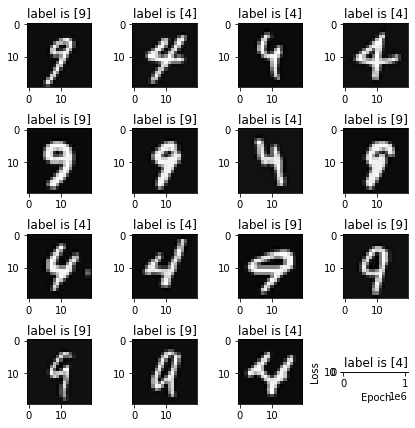

In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import pickle
import time

start = time.time()

# MNIST Dataset 불러오기
infile = open('mnist_49_random.pkl','rb')
mnist_data = pickle.load(infile)
infile.close()
# 데이터 라벨링
Xtrain = mnist_data['Xtrain']
ytrain = mnist_data['ytrain']
# Check samples
index = np.arange(16)
index = index.reshape(4,4)
image = Xtrain[index]
label = ytrain[index]

fig, axarr = plt.subplots(index.shape[0],index.shape[1], figsize=(6,6))
fig.tight_layout(pad=1.0)  
for i in np.arange(index.shape[0]):
    for j in np.arange(index.shape[1]):
        axarr[i,j].imshow(Xtrain[index[i,j], :].reshape(20,20), cmap='gray')
        axarr[i,j].set_title('label is {}'.format(ytrain[index[i,j]]))
# 시그모이드 함수
def sigmoid(x):
    return 1/(1+np.exp(-x))
theta = np.random.randn(Xtrain.shape[1]+1, 1)
z = np.sum(theta[1:, 0]*Xtrain[0,:]) + theta[0, 0]
x1 = Xtrain[0, :].reshape(-1,1)
Xtrain_tilde = np.hstack([np.ones((Xtrain.shape[0], 1)), Xtrain])

y = np.zeros_like(ytrain)
y[ytrain==4]=1
y[ytrain==9]=0

# 모델 구현
def model(X, theta):
    return sigmoid(np.matmul(X, theta))
H = model(Xtrain_tilde, theta)

# Decision Boundary
def decision(H, p, y):
    pred = np.zeros_like(H)
    pred[H>=p]=1
    accuracy = np.mean(pred==y)
    return pred, accuracy
pred, acc = decision(H, 0.5, y)

# Cost Function
def cost(H, y):
    J=-np.matmul(y.T, np.log(H))-np.matmul((1-y).T, np.log(1-H))
    return J/H.shape[0]

# Gredient Function
def grad(X, H, y):
    return np.matmul(X.T, H-y)/X.shape[0]
def grad_reg(X, H, y, theta, rp):
    return np.matmul(X.T, H-y)/X.shape[0]+rp*2.0*theta/X.shape[0]

#Epoch 진행
num_epoch = 1000000 # epoch 총 수
lr = 0.01 # learning rate
rp = 0.1
# epoch 별 loss 저장하기 위한 array
loss = np.zeros(num_epoch)
accuracy = np.zeros(num_epoch)

# theta 초기화
np.random.seed(seed=0)
theta = np.random.randn(Xtrain.shape[1]+1, 1)

skip = 100000
for e in range(num_epoch):
    
    H = model(Xtrain_tilde, theta)
    loss[e] = cost(H, y)
    junk, accuracy[e] = decision(H, 0.5, y)
    #G = grad(Xtrain_tilde, H, y)
    G = grad_reg(Xtrain_tilde, H, y, theta, rp)
    theta = theta - lr*G
    
    if e%skip == 0:
        print(f'--- starting epoch {e} ----')
        print('accuracy = ', accuracy[e])
        print('loss = ', loss[e])
        
# 결과값 출력
plt.plot(accuracy, label='accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.plot(loss)
plt.xlabel('Epoch')
plt.ylabel('Loss')

# 성능 평가를 위한 Test Dataset분류
Xtest = mnist_data['Xtest']
ytest = mnist_data['ytest']
Xtest = np.hstack([np.ones((Xtest.shape[0], 1)), Xtest])
ytest[ytest==4] = 1
ytest[ytest==9] = 0
H_test = model(Xtest, theta)
test_loss = cost(H_test, ytest)
test_pred, test_accuracy = decision(H_test, 0.5, ytest)
print('test_loss=', test_loss)
print('test_accuracy=', test_accuracy)

end = time.time()
execution_time = end - start
print("실행시간: ",execution_time,"초")